In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [96]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3114,3115,15636023,O'Donnell,619,France,Female,40,10,0.00,1,1,1,147093.84,1,1,3,DIAMOND,298
7526,7527,15800554,Perry,850,France,Female,81,1,0.00,2,1,1,59568.24,0,0,3,GOLD,886
7658,7659,15666297,Abramova,706,Spain,Female,53,3,0.00,3,0,0,88479.02,1,1,3,SILVER,390
3717,3718,15623536,Madukwe,646,Germany,Male,39,0,154439.86,1,1,0,171519.06,0,0,4,GOLD,422
7610,7611,15615670,Kazakova,762,France,Male,36,5,119547.46,1,1,1,42693.65,0,0,5,GOLD,972


In [97]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [98]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
167,615,Spain,Female,41,9,109013.23,1,1,0,196499.96,0,0,1,PLATINUM,561
2934,631,France,Male,33,7,0.00,1,1,1,58043.02,1,1,2,SILVER,715
1972,733,Spain,Female,30,0,83319.28,1,0,0,57769.20,0,0,2,PLATINUM,627
6125,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0,0,2,PLATINUM,354
414,795,Spain,Male,35,8,0.00,2,1,0,167155.36,0,0,2,DIAMOND,708


In [99]:
#### Visualization

In [100]:
df["Tenure"].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [101]:
def unique_val(df):
  for col in df:
    if df[col].dtype == "object":
      print(f'{col} : {df[col].unique()}')



In [102]:
unique_val(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']
Card Type : ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [107]:
df = pd.get_dummies(df,columns=["Geography","Gender","Card Type"]).replace([False,True],[0,1])

<ipython-input-107-a96a4351ec0c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.get_dummies(df,columns=["Geography","Gender","Card Type"]).replace([False,True],[0,1])


In [108]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,1,0,1,0,0


In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ["CreditScore","Age","Tenure","Balance","EstimatedSalary","Point Earned"]
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [110]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
908,0.670,0.175676,1.0,0.538919,1,1,1,0.628889,0,0,...,0.368899,0,0,1,0,1,0,1,0,0
1175,0.738,0.283784,0.5,0.000000,2,1,0,0.728810,0,0,...,0.247446,0,0,1,0,1,0,0,0,1
8147,0.584,0.283784,0.8,0.511220,1,1,0,0.308935,1,1,...,0.182747,0,1,0,1,0,0,1,0,0
2748,0.102,0.405405,0.8,0.510726,1,1,0,0.878794,1,1,...,0.298524,0,1,0,0,1,0,1,0,0
835,0.418,0.216216,0.2,0.547593,2,1,0,0.048332,0,0,...,0.768445,1,0,0,0,1,0,0,1,0


In [111]:
df.dtypes

,0
CreditScore,float64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Complain,int64


In [112]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited",axis=1)
y = df["Exited"]

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [113]:
X_train.shape

(8000, 20)

In [115]:
X_test.shape

(2000, 20)

In [116]:
model = keras.Sequential([
    keras.layers.Dense(18,input_shape=(20,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])


model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8104 - loss: 0.4219
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9960 - loss: 0.0554
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0134
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0106
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0099
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0152
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0120
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0099
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0111
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0043


In [117]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0057  


[0.006993613671511412, 0.9990000128746033]

In [118]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [119]:
y_test.head(5)

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


In [121]:
y_prediction = []
for ele in y_pred:
  if ele > 0.5 :
    y_prediction.append(1)
  else:
    y_prediction.append(0)


In [122]:
y_test.head(5)

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


In [123]:
y_prediction[:5]

[0, 0, 0, 0, 0]

In [124]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test,y_prediction)
cm

array([[1606,    1],
       [   1,  392]])

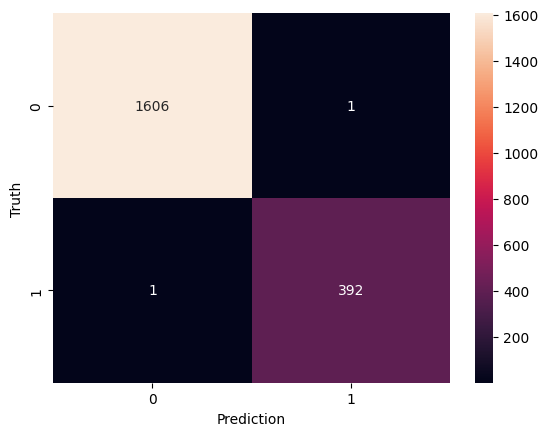

In [125]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [126]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [127]:
import joblib
joblib.dump(model,"bank_customer_churn.pkl")

['bank_customer_churn.pkl']

In [129]:
### Precision for 0 class
round((1660/(1660+1)),2)

1.0

In [130]:
### precision for 1 class
round(392/(392+1),2)

1.0